### **The aim of this challenge is to classify credit card transaction as fraudulent or not.** 

In [ ]:
#from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Machine Learning India datasets/machine_learning_india_ai_challenge-dataset.zip (Unzipped Files)/TRAIN.csv")
test=pd.read_csv("/content/drive/MyDrive/Machine Learning India datasets/machine_learning_india_ai_challenge-dataset.zip (Unzipped Files)/TEST.csv")

In [ ]:
print(train.shape, test.shape)

(284455, 31) (352, 30)


In [ ]:
print(train.columns, test.columns)

Index(['Index', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') Index(['Index', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


**Let us now check the missing values in the dataset**

In [ ]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

Index     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
************
Index     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


**Exploratory Data Analysis**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   284455 non-null  int64  
 1   V1      284455 non-null  float64
 2   V2      284455 non-null  float64
 3   V3      284455 non-null  float64
 4   V4      284455 non-null  float64
 5   V5      284455 non-null  float64
 6   V6      284455 non-null  float64
 7   V7      284455 non-null  float64
 8   V8      284455 non-null  float64
 9   V9      284455 non-null  float64
 10  V10     284455 non-null  float64
 11  V11     284455 non-null  float64
 12  V12     284455 non-null  float64
 13  V13     284455 non-null  float64
 14  V14     284455 non-null  float64
 15  V15     284455 non-null  float64
 16  V16     284455 non-null  float64
 17  V17     284455 non-null  float64
 18  V18     284455 non-null  float64
 19  V19     284455 non-null  float64
 20  V20     284455 non-null  float64
 21  V21     28

In [ ]:
train.corr()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,1.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
V1,-0.00,1.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.53,0.09
V3,0.00,-0.00,0.00,1.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.01,-0.00,-0.01,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.18
V4,-0.00,0.00,-0.00,0.00,1.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,0.00,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.00,-0.00,0.00,-0.00,0.00,1.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.39,-0.09
V6,0.00,-0.00,0.00,-0.00,0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.22,-0.04
V7,-0.00,-0.00,0.00,-0.01,0.00,-0.00,-0.00,1.00,0.00,-0.00,-0.01,0.00,-0.01,0.00,-0.01,0.00,-0.01,-0.01,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.40,-0.18
V8,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.10,0.02
V9,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.04,-0.09


In [ ]:
train.describe()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00,284455.00
mean,142227.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,88.36,0.00
std,82115.23,1.96,1.65,1.51,1.41,1.38,1.33,1.23,1.19,1.10,1.09,1.02,0.99,1.00,0.95,0.92,0.87,0.84,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.18,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-13.56,-25.16,-9.34,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,71113.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,142227.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,213340.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.20,0.00
max,284454.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [ ]:
pd.value_counts(train['Class'], sort=True)

0    284015
1       440
Name: Class, dtype: int64

**Determine the number of fraud and valid transactions in the entire dataset**.

In [ ]:
fraud        = train.loc[train['Class']==1]
normal_trans = train.loc[train['Class']==0]
print("Number of Fraudalent Transactions : ", len(fraud))
print("Number of Non-Fraudalent Transactions : ", len(normal_trans))

Number of Fraudalent Transactions :  440
Number of Non-Fraudalent Transactions :  284015


**How different are the amount of money used in different transaction classes?**

In [ ]:
pd.concat([fraud.Amount.describe(), normal_trans.Amount.describe()], axis=1)

,Amount,Amount
count,440.00,284015.00
mean,118.42,88.31
std,245.49,250.18
min,0.00,0.00
25%,1.00,5.65
50%,9.17,22.00
75%,106.13,77.05
max,2125.87,25691.16


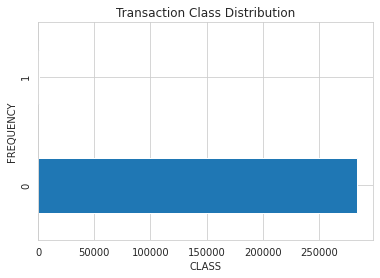

In [ ]:
#unbalanced data
import matplotlib.pyplot as plt

count_classes=pd.value_counts(train['Class'], sort=True)
count_classes.plot(kind='barh',rot=90)
plt.title("Transaction Class Distribution")
plt.xlabel('CLASS')
plt.ylabel('FREQUENCY')
plt.show()

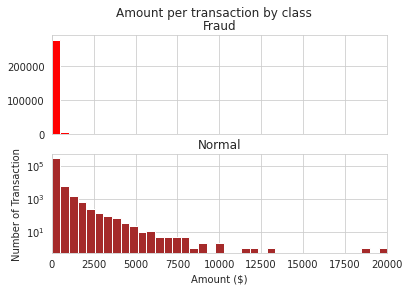

In [ ]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=50

ax1.hist(train.Amount,bins=bins,color='red')
ax1.set_title('Fraud')
ax2.hist(train.Amount,bins=bins,color='brown')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transaction')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

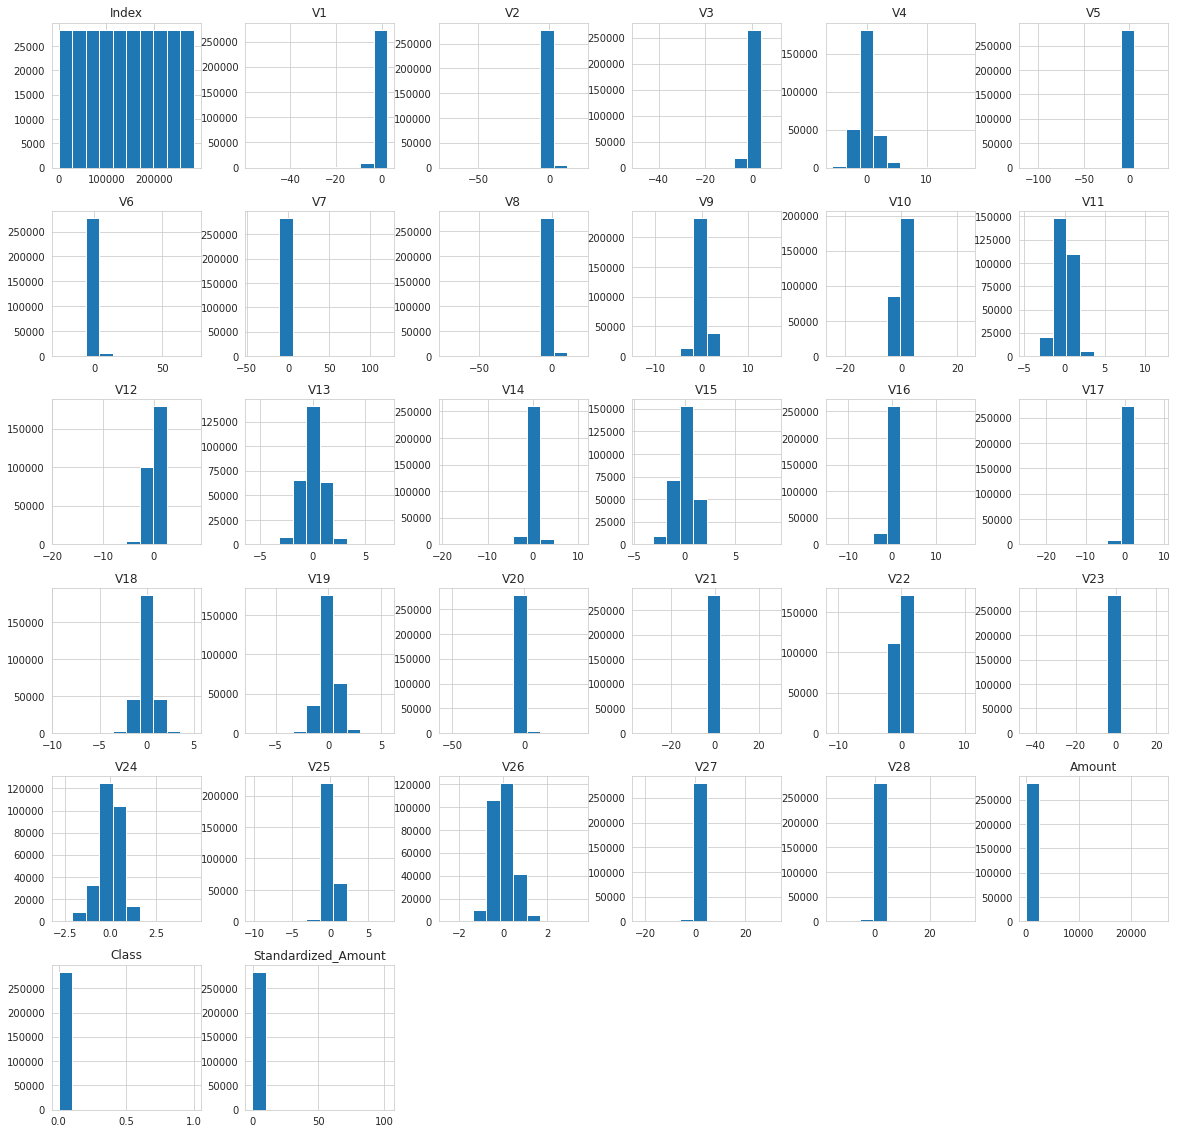

In [ ]:
train.hist(figsize=(20, 20));

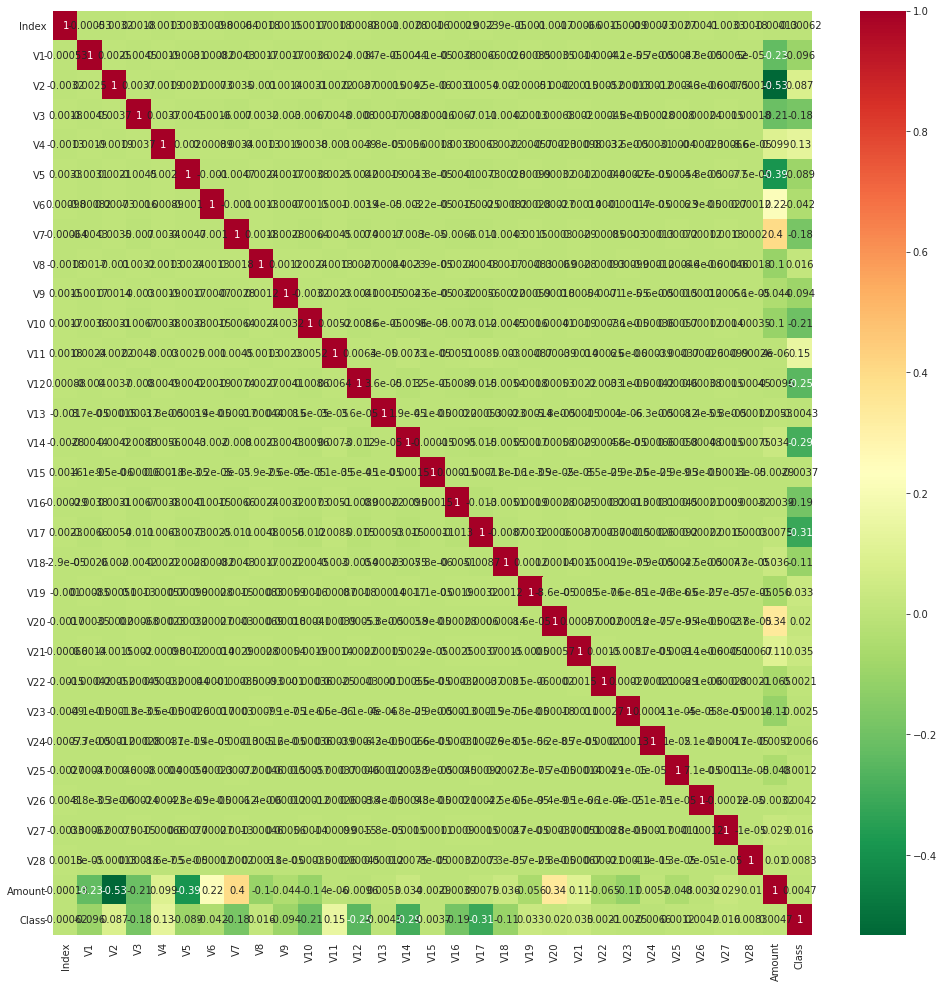

In [ ]:
# heatmap to find any high correlations

import seaborn as sns
corrmat=train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(17,17))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='RdYlGn_r')

**Using Artificial neural networks to train out model.**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential     
from keras.layers import Dense
from keras.layers import Dropout
import itertools

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

model = Sequential()                                               # Initialize the constructor
# Define model architecture
model.add(Dense(input_dim = 30, units=32, activation = 'relu'))    #adding input layer
model.add(Dense(units = 24, activation = 'relu'))                  #adding 2nd hidden layer
model.add(Dropout(0.5))                                            #adding dropout layer
model.add(Dense(units = 20, activation = 'relu'))                  #adding 3rd hidden layer
model.add(Dropout(0.5))                                            #adding dropout layer
model.add(Dense(units = 8, activation = 'relu'))                  #adding 4th hidden layer
model.add(Dropout(0.5))                                            #adding dropout layer
model.add(Dense(units = 1, activation = 'sigmoid'))                #adding output layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                792       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 168       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0

In [ ]:
scaler = StandardScaler()
train['Standardized_Amount'] = scaler.fit_transform(train['Amount'].values.reshape(-1, 1))

In [ ]:
X = train.drop(['Class'], axis =1)
y = train['Class']  

In [ ]:
X = train.drop(['Standardized_Amount','Class'], axis =1)
y = train['Class']
oversample = SMOTE()
X_sample , y_sample = oversample.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 10)

Epoch 1/10
12327/12327 [==============================] - 17s 1ms/step - loss: 50.4440 - accuracy: 0.9840
Epoch 2/10
12327/12327 [==============================] - 16s 1ms/step - loss: 0.0225 - accuracy: 0.9985
Epoch 3/10
12327/12327 [==============================] - 16s 1ms/step - loss: 0.0177 - accuracy: 0.9983
Epoch 4/10
12327/12327 [==============================] - 16s 1ms/step - loss: 0.0155 - accuracy: 0.9985
Epoch 5/10
12327/12327 [==============================] - 16s 1ms/step - loss: 0.0154 - accuracy: 0.9984
Epoch 6/10
12327/12327 [==============================] - 17s 1ms/step - loss: 0.0193 - accuracy: 0.9982
Epoch 7/10
12327/12327 [==============================] - 16s 1ms/step - loss: 0.0131 - accuracy: 0.9984
Epoch 8/10
12327/12327 [==============================] - 16s 1ms/step - loss: 0.0116 - accuracy: 0.9985
Epoch 9/10
12327/12327 [==============================] - 16s 1ms/step - loss: 0.0168 - accuracy: 0.9983
Epoch 10/10
12327/12327 [=============================

In [ ]:
model_score = model.evaluate(X_test, y_test)
print(model_score)

3112/3112 [==============================] - 3s 845us/step - loss: 0.0110 - accuracy: 0.9985
[0.010986587963998318, 0.9985436201095581]


**creating confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred.round())
print(cm)

[[99415     0]
 [  145     0]]


**Calculating Performance**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
print("Accuracy Score : ", accuracy_score(y_test, pred.round()))
print("f1 Score : ", f1_score(y_test, pred.round()))
print("precision score : ", precision_score(y_test, pred.round()))
print("Recall Score : ", recall_score(y_test, pred.round()))

Accuracy Score :  0.9985435918039374
f1 Score :  0.0
precision score :  0.0
Recall Score :  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(test)

scaler = StandardScaler()

test['Standardized_Amount'] = scaler.fit_transform(test['Amount'].values.reshape(-1, 1))
print(test)

test=test.drop(['Amount'],axis=1)
target = model.predict(test)

     Index    V1    V2    V3    V4    V5  ...   V24   V25   V26   V27   V28  Amount
0        0  1.76 -0.86 -1.63  0.16  0.03  ... -1.05 -0.02 -0.04 -0.06 -0.04  186.76
1        1 -0.71  1.16  1.13  2.74  1.20  ...  1.14 -0.15  0.06 -0.28 -0.02   21.18
2        2  1.04 -0.93  0.64 -2.09 -0.53  ... -0.98  0.26 -0.73  0.18  0.01    1.00
3        3 -4.19  4.38 -5.12  4.46 -4.81  ...  0.01 -0.15 -0.13  0.47  0.47   14.46
4        4  1.19  0.17  0.10  1.14  0.16  ... -0.47  0.83 -0.31  0.02  0.01   27.00
..     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...     ...
347    347 -2.74  3.66 -4.11  5.34 -2.67  ... -0.15 -0.40  0.28  0.83  0.22  112.33
348    348  2.00  0.02 -1.58  0.28  0.47  ...  0.23 -0.16  0.38 -0.04 -0.03   20.71
349    349 -0.63  1.57  0.52  3.35  0.84  ... -0.44 -0.60 -0.16  0.04  0.11   47.73
350    350 -0.26  0.97  0.11 -0.64  0.37  ... -0.07 -0.40  0.15  0.38  0.15   44.99
351    351  1.35 -0.52  0.56 -0.63 -1.12  ...  0.37  0.16 -0.41  0.02  0.02 

In [ ]:
target = pd.DataFrame(target)

In [ ]:
predictions =model.predict(test)
predictions_data = pd.DataFrame(data=predictions, columns=["Class"])
predictions_data.head()

,Class
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00


In [ ]:
fraud_test_index = test[["Index"]].copy()
fraud_test_index.head()

,Index
0,0
1,1
2,2
3,3
4,4


In [ ]:
final_data=pd.concat([fraud_test_index, predictions_data], axis=1, sort=True)
final_data.head()

,Index,Class
0,0,0.00
1,1,0.00
2,2,0.00
3,3,0.00
4,4,0.00


In [ ]:
final_data.to_csv('/content/target_prediction.csv', index=False)